<a href="https://colab.research.google.com/github/elephantcastle/machine-learning-grokking/blob/main/03_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification models
Classification models are similar to regression models, in that their aim is to predict the labels of a dataset based on the features. The difference is that regression models aim to predict a number, whereas classification models aim to predict a state or a category.

**Perceptron**: linear classifier, its purpose is to classify the points as best as possible with regards to belonging to a category.

Say our language has n words, that we call $1, 2, … , n.$ Our dataset consists of m sentences, which we call $x^{(1)}, x^{(2)}, … , x^{(m)}$. Each sentence $x^{(i)}$ comes with a label $y_i$, which is 1 if the sentence
is happy and 0 if it is sad. The way we record each sentence is using the number of appearances of each of the n words. Therefore, each sentence corresponds to a row in our dataset and can be seen as a vector, or an n-tuple of numbers $x^{(i)} = (x_1^{(i)}, x_2^{(i)}, … , x_n^{(i)})$, where $x_j^{(i)}$ is the number of appearances of the word $j$ in the $i-th$ sentence.
The perceptron classifier consists of ${n}$ weights (scores), one for each of the n words in our language, and a bias. The weights are denoted ${w_i}$ and the bias $b$. Thus, the prediction that the classifier makes for the sentence ${x^{(i)}}$ is

\begin{align} 
  y' = step(w_1*x_1^{(i)} + w_2*x_2^{(i)} + … +w_n*x_n^{(i)} + b)
\end{align}

The bias is negative if we expect by default that no data returns a negative value else the opposite.

**Error function**: to compare the classifiers; we need something that tells us how good it is(distance from line good idea but too difficult; number of success/errors doesn’t tell us by how much we err) so we use error function that takes the average abs score;
We adjust biases and weights but how much they appear(features[i] ) and relative error (label-pred)

---

In [34]:
import numpy as np
import random
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

def score(weights, bias, features):
  return np.dot(features, weights) + bias

def step(x):
  if x >= 0:
    return 1
  else:
    return 0

def prediction(weights, bias, features):
  return step(score(weights, bias, features))

def error(weights, bias, features, label):
  pred = prediction(weights, bias, features)
  if pred == label:
    # If the prediction is equal to the label, then the point is well classified, which means the error is zero.
    # If the prediction is different from the label, then the point is misclassified, which means the error is equal to the absolute value of the score.
    return 0
  else:
    return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)): # Loops through our data, and for each point, adds the error at that point, then returns this error
    total_error += error(weights, bias, features[i], labels[i])
  return total_error/len(features)

def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
  pred = prediction(weights, bias, features)
  for i in range(len(weights)):
    weights[i] += (label-pred)*features[i]*learning_rate
  bias += (label-pred)*learning_rate
  return weights, bias

def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
  weights = [1.0 for i in range(len(features[0]))]
  bias = 0.0
  errors = [] # An array to store the errors
  for epoch in range(epochs):
    error = mean_perceptron_error(weights, bias, features, labels)
    errors.append(error)
    i = random.randint(0, len(features)-1) # Picks a random point in our dataset
    weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
  return weights, bias

perceptron_algorithm(features, labels)

([0.4499999999999995, 0.11999999999999934], -0.6900000000000004)



---


Exemple of perceptron for $AND/OR/XOR$ gates.

Many equations work for the line separating the AND dataset. We’ll pick the line with equation `x1 + x2 – 1.5`. Thus, the perceptron that classifies this dataset makes the prediction  `yˆ = step(x1 + x2 – 1.5).`

Similarly, many equations work for the OR dataset, and we pick the line with equation `x1 + x2 – 0.5.` The equation for the prediction is `yˆ = step(x1 + x2 – 0.5)`.

Notice that the dataset for XOR is impossible to separate using a single line. Thus, there is no perceptron model that perfectly fits the XOR dataset. However, a combination of perceptrons can separate this dataset.

# Logistic classifier (Continuous Perceptron)

logistic classifier: assigns a score from 0 to 1 to each sentence, the happier a sentence is, the higher the score it receives.

We can visualize continuous perceptrons similar to discrete perceptrons: with a line (or high-dimensional plane) that separates two classes of data. The only difference is that the discrete perceptron predicts that everything to one side of the line has label 1 and to the other side has label 0, whereas the continuous perceptron assigns a value from 0 to 1 to all the points based on their position with respect to the line. Every point on the line gets a value of 0.5.

We take the score and return a value between 0 and 1 escluded by using the sigmoid function defined as below:
\begin{align} 
  σ(x) = \frac{ 1 }{ 1 + e^{-x} }
\end{align}

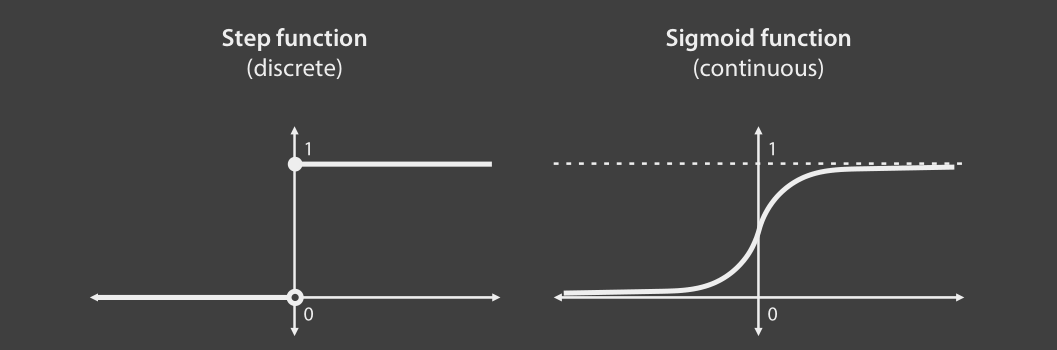

We use the logloss `log loss = –y ln(yˆ) – (1 – y) ln(1 – yˆ)` as error function, where `y` is the label and `yˆ` the predicted result.

The process is similar to the process of training a linear regression model or a perceptron classifier and consists of the following steps:

• Start with a random logistic classifier.

• Repeat many times:
– Slightly improve the classifier.

• Measure the log loss to decide when to stop running the loop.

In [35]:
import numpy as np
import random
import matplotlib
from matplotlib import pyplot
from matplotlib import pyplot as plt

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[3,2],[2,3]])
labels = np.array([0,0,0,0,1,1,1,1])

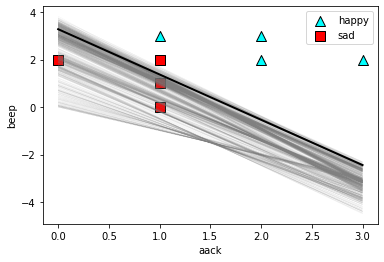

([0.8544551796281455, 0.4476521069458652], -1.4698750377276848)

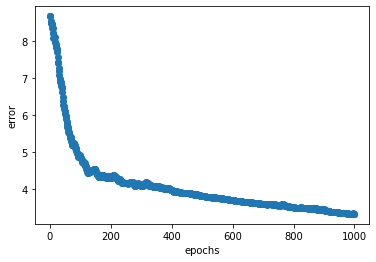

In [36]:
def sigmoid(x):
  return np.exp(x)/(1+np.exp(x))

def score(weights, bias, features):
  return np.dot(weights, features) + bias

def prediction(weights, bias, features):
  return sigmoid(score(weights, bias, features))

def log_loss(weights, bias, features, label):
  pred = prediction(weights, bias, features)
  return -label*np.log(pred) - (1-label)*np.log(1-pred)

def total_log_loss(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)):
    total_error += log_loss(weights, bias, features[i], labels[i])
  return total_error

def logistic_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = prediction(weights, bias, features)
    for i in range(len(weights)):
        weights[i] += (label-pred)*features[i]*learning_rate
    bias += (label-pred)*learning_rate
    return weights, bias

def logistic_regression_algorithm(features, labels, learning_rate = 0.01, epochs = 1000):
    plot_points(features, labels)
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for i in range(epochs):
        # Comment the following line of code to remove the plots of all the classifiers
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=0.1, linestyle='dotted')
        errors.append(total_log_loss(weights, bias, features, labels))
        j = random.randint(0, len(features)-1)
        weights, bias = logistic_trick(weights, bias, features[j], labels[j])
    draw_line(weights[0], weights[1], bias)
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.xlabel('epochs')
    plt.ylabel('error')
    return weights, bias


logistic_regression_algorithm(features, labels)


---
Classifying into multiple classes: The softmax function

If we want to find a continuous classifier for multiple `n` categories, we build `n` classifier and the probability that our item belongs to each class is found using softmax as defined below. 

If we have n classifiers that output the n scores a1, a2, … ,
an, the probabilities obtained are p1, p2, … , pn, where

\begin{align} 
  \text{Softmax}(p_{i}) = \frac{ \exp(a_i) }{ \sum_j \exp(a_j) }
\end{align}


# Naive Bayes model
It does what most classification models do, which is predict a label out of a set of features.

**Prior -> Event -> Posterior**: Probability of an event --> new information available --> updated probability of an event. 

For example the probability of being sick 1/10000. A test with accuracy of 99%  for both healthy and sick gives us the matrix below.

If somebody took a test and is positive(sick) then his probability of being sick(new probability) is $\frac{ 99 }{ 9999 + 99 }=0.0098$ or $0.98$%; less that the initial one.

This is because it is more probable to be amongst the ones misdiagnosed than the ones actually being sick.


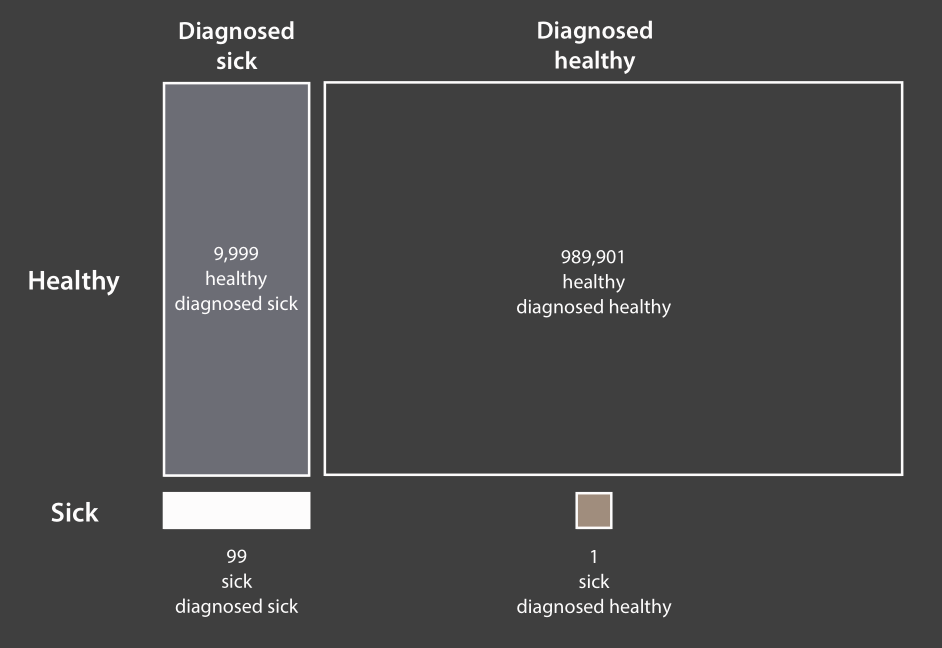

**Bayes theorem:**

For events E and F ($\text{P}(E|F)$ probability of $E$ knowing $F$)

\begin{align} 
  \text{P}(E|F) = \frac{ \text{P}(F|E)*\text{P}(E) }{ \text{P}(F) }
\end{align}

\begin{align} 
  \text{P}(E|F) = \frac{ \text{P}(F|E)*\text{P}(E) }{ \text{P}(F|E)*\text{P}(E) + \text{P}(F|E^C)*\text{P}(E^C) }
\end{align}

To check for multiple events we can use a "naive assumption" in determinate models: the events are completely independent of each other, this lets us use the product of probabilities, a general version of the theorem is below. 

\begin{align} 
  \text{P}(spam|x_1, x_2, ..., x_n) = \frac{ \text{P}(spam|x_1)*\text{P}(spam|x_2)*...\text{P}(spam|x_n)*\text{P}(spam)}{ \text{P}(x_1|spam)*\text{P}(x_2|spam)...\text{P}(x_n|spam)*\text{P}(spam) + \text{P}(x_1|spam^C)*\text{P}(x_2|spam^C)...\text{P}(x_n|spam^C)*\text{P}(spam^C)}
\end{align}



---


### The below example tries to build a Bayesian model to classify emails by their content.

In [37]:
import numpy as np
import pandas as pd

emails = pd.read_csv('emails.csv')

def process_email(text):
    text = text.lower()
    return list(set(text.split()))

emails['words'] = emails['text'].apply(process_email)
emails[:10]

num_emails = len(emails)
num_spam = sum(emails['spam'])

print("Number of emails:", num_emails)
print("Number of spam emails:", num_spam)
print()

# Calculating the prior probability that an email is spam
print("Probability of spam:", num_spam/num_emails)

Number of emails: 5728
Number of spam emails: 1368

Probability of spam: 0.2388268156424581


In [42]:
model = {}

# Training process
for index, email in emails.iterrows():
    for word in email['words']:
        if word not in model:
            model[word] = {'spam': 1, 'ham': 1}
        if word in model:
            if email['spam']:
                model[word]['spam'] += 1
            else:
                model[word]['ham'] += 1

print(model)

{'convenience': {'spam': 35, 'ham': 119}, 'its': {'spam': 186, 'ham': 330}, 'unlimited': {'spam': 59, 'ham': 9}, 'make': {'spam': 276, 'ham': 711}, 'list': {'spam': 243, 'ham': 400}, 'letsyou': {'spam': 24, 'ham': 1}, 'automaticaily': {'spam': 6, 'ham': 1}, 'use': {'spam': 207, 'ham': 540}, 'three': {'spam': 89, 'ham': 192}, 'ciear': {'spam': 10, 'ham': 1}, 'be': {'spam': 639, 'ham': 2648}, 'amount': {'spam': 93, 'ham': 105}, 'done': {'spam': 81, 'ham': 229}, 'ieader': {'spam': 17, 'ham': 1}, 'hard': {'spam': 56, 'ham': 135}, 'logo': {'spam': 97, 'ham': 13}, 'result': {'spam': 68, 'ham': 112}, 'provided': {'spam': 109, 'ham': 113}, 'easy': {'spam': 111, 'ham': 62}, 'it': {'spam': 590, 'ham': 2173}, 'and': {'spam': 989, 'ham': 3569}, '100': {'spam': 141, 'ham': 118}, 'company': {'spam': 231, 'ham': 447}, 'at': {'spam': 450, 'ham': 2364}, 'a': {'spam': 999, 'ham': 3414}, 'provide': {'spam': 142, 'ham': 408}, 'recollect': {'spam': 26, 'ham': 1}, 'through': {'spam': 148, 'ham': 495}, 'real

In [39]:
def predict_bayes(word):
    word = word.lower()
    num_spam_with_word = model[word]['spam']
    num_ham_with_word = model[word]['ham']
    return 1.0*num_spam_with_word/(num_spam_with_word + num_ham_with_word)

In [47]:
def predict_naive_bayes(email):
    total = len(emails)
    num_spam = sum(emails['spam'])
    num_ham = total - num_spam
    email = email.lower()
    words = set(email.split())
    spams = [1.0]
    hams = [1.0]
    for word in words:
        if word in model:
            spams.append(model[word]['spam']/num_spam*total) #  just divide everywhere by total to get the original formula
            hams.append(model[word]['ham']/num_ham*total) # this is done to avoid zero division error
    prod_spams = np.long(np.prod(spams)*num_spam)   
    prod_hams = np.long(np.prod(hams)*num_ham)
    return prod_spams/(prod_spams + prod_hams)

In [46]:
predict_naive_bayes('buy cheap lottery easy money now')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use

0.999973472265966